In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# train_df.shape=(200000, 2)
train_df = pd.read_csv('datasets/train_set.csv', sep='\t')
train_df

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
...,...,...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...


In [3]:
# 均无缺失值
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   200000 non-null  int64 
 1   text    200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [4]:
# test_df.shape=(50000, )
test_df = pd.read_csv('datasets/test_a.csv', sep='\t')
test_df

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...
...,...
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [6]:
# 'text_len':句子长度
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
train_df

,label,text,text_len
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307
...,...,...,...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...,868
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...,1142
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...,1180
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...,179


In [7]:
test_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
test_df

,text,text_len
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...,1057
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...,486
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...,764
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...,1570
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...,307
...,...,...
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...,1484
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...,995
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...,394
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...,957


In [8]:
# 大部分句子的长度都集中在1500以内
print(train_df['text_len'].describe(), end='\n\n')
print(test_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

count    50000.000000
mean       904.589900
std        961.345267
min          2.000000
25%        373.000000
50%        670.500000
75%       1123.000000
max      44665.000000
Name: text_len, dtype: float64


In [9]:
# 仅有37.5%的样本长度低于或等于512
np.percentile(train_df['text_len'], q=37.2)

512.0

In [10]:
# 文本长度大部分(99.5%)在5159以内
np.percentile(train_df['text_len'], q=99.5)

5159.0

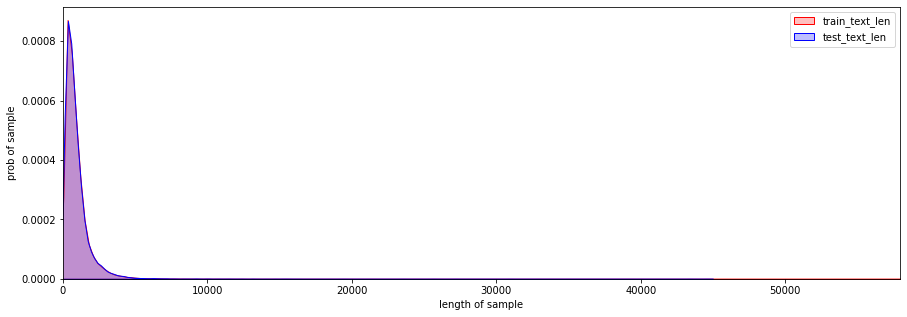

In [11]:
# 观察训练数据集与测试数据集分布情况
plt.figure(figsize=(15, 5))
ax = plt.subplot(111)
sns.kdeplot(train_df['text_len'], ax=ax, color='red', fill=True)
sns.kdeplot(test_df['text_len'], ax=ax, color='b', fill=True)
ax.set_xlim([0, max(max(train_df['text_len']), max(test_df['text_len']))])
plt.xlabel("length of sample")
plt.ylabel("prob of sample")
plt.legend(['train_text_len', 'test_text_len'])

In [12]:
# p值不小于阈值0.05,接受原假设,train_df['text_len']与test['text_len']来自相同分布
stats.ks_2samp(train_df['text_len'], test_df['text_len'])

KstestResult(statistic=0.004655000000000076, pvalue=0.3503043887727427)

Text(0.5, 0, 'category')

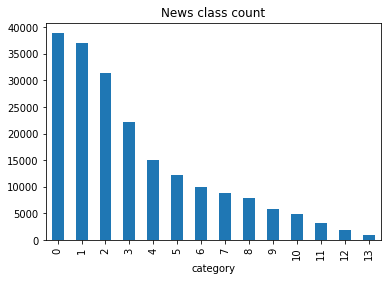

In [13]:
# {'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5,
# '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
train_df['label'].value_counts().plot(kind='bar')  # 存在类别不均衡的情况
plt.title('News class count')
plt.xlabel("category")

<AxesSubplot:xlabel='label', ylabel='text_len'>

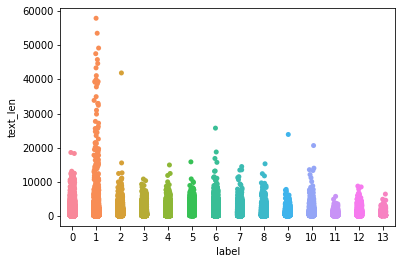

In [14]:
# 不同类别的文章长度不同
sns.stripplot(x="label", y="text_len", data=train_df)

In [15]:
all_lines = ' '.join(train_df['text'].values.tolist())
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: d[1], reverse=True)

# 共有6869个单词
print(len(word_count))

# 出现频率最高的10个词
for i in range(10):
    print(word_count[i])

# 出现频率最低的10个词
for j in range(-11, -1):
    print(word_count[j])

6869
('3750', 7482224)
('648', 4924890)
('900', 3262544)
('3370', 2020958)
('6122', 1602363)
('4464', 1544962)
('7399', 1455864)
('4939', 1387951)
('3659', 1251253)
('4811', 1159401)
('5061', 1)
('4135', 1)
('4256', 1)
('6911', 1)
('1926', 1)
('2010', 1)
('155', 1)
('1415', 1)
('1015', 1)
('4468', 1)


In [16]:
# 字符3750、字符900和字符648在20w新闻的覆盖率较高,很有可能是标点符号
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines_unique = ' '.join(list(train_df['text_unique']))
word_count_unique = Counter(all_lines_unique.split(" "))
word_count_unique = sorted(word_count_unique.items(), key=lambda d: int(d[1]), reverse=True)
# 打印整个训练集中覆盖率前20的词
for i in range(20):
    print("{} occurs {} times, {}%".format(word_count_unique[i][0], word_count_unique[i][1],
                                           (word_count_unique[i][1] / 200000) * 100))

3750 occurs 197997 times, 98.9985%
900 occurs 197653 times, 98.8265%
648 occurs 191975 times, 95.9875%
2465 occurs 177310 times, 88.655%
6122 occurs 176543 times, 88.2715%
7399 occurs 176249 times, 88.1245%
4811 occurs 169371 times, 84.6855%
4464 occurs 167161 times, 83.5805%
1699 occurs 164856 times, 82.428%
3659 occurs 163171 times, 81.5855%
2400 occurs 163070 times, 81.535%
299 occurs 163068 times, 81.53399999999999%
3370 occurs 162335 times, 81.1675%
2109 occurs 159373 times, 79.68650000000001%
4939 occurs 158713 times, 79.3565%
5598 occurs 156009 times, 78.0045%
669 occurs 155729 times, 77.8645%
5445 occurs 154533 times, 77.26650000000001%
4853 occurs 153050 times, 76.525%
2376 occurs 149517 times, 74.75850000000001%


In [17]:
# '3750'可能为句号
for i in train_df['text'][0].split('3750'):
    print(len(i))

print('***********************')

for i in train_df['text'][0].split('900'):
    print(len(i))

print('***********************')

for i in train_df['text'][0].split('648'):
    print(len(i))

print('***********************')

173
60
73
45
149
41
181
68
43
30
146
128
31
56
105
21
48
138
73
66
121
145
59
45
120
183
31
41
48
75
74
58
40
129
10
26
55
208
81
113
114
44
26
98
49
42
116
33
26
63
20
110
60
127
16
50
45
65
19
55
147
80
69
30
23
***********************
300
166
217
270
183
96
101
163
314
116
261
114
38
326
191
164
74
92
166
46
301
158
187
95
106
89
320
202
134
35
5
***********************
339
113
25
135
209
241
16
349
21
33
265
334
195
57
50
149
36
650
62
441
174
149
252
158
280
203
106
***********************


In [18]:
def func(lst):
    enc = OrdinalEncoder()
    arr = np.array(lst).reshape(-1, 1)
    arr_enc = enc.fit_transform(arr).astype(np.int_).reshape(-1, )
    freq = np.bincount(arr_enc)
    max_freq = np.argmax(freq)
    max_freq_value = enc.inverse_transform(np.array([[max_freq]]))[0][0]
    return max_freq_value

In [19]:
train_df['text_split'] = train_df['text'].apply(lambda x: x.split())
train_df['len'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['first_char'] = train_df['text_split'].apply(lambda x: x[0])
train_df['last_char'] = train_df['text_split'].apply(lambda x: x[-1])
train_df['most_freq'] = train_df['text_split'].apply(func)
train_df

,label,text,text_len,text_unique,text_split,len,first_char,last_char,most_freq
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057,4469 2646 7420 4280 1641 4173 2828 4190 6045 6...,"[2967, 6758, 339, 2021, 1854, 3731, 4109, 3792...",1057,2967,1635,3750
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486,656 5928 1452 3137 5689 1394 4939 418 2646 669...,"[4464, 486, 6352, 5619, 2465, 4802, 1452, 3137...",486,4464,900,3750
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764,3545 3137 4190 6045 5822 3223 3725 141 5525 40...,"[7346, 4068, 5074, 3747, 5681, 6093, 1777, 222...",764,7346,57,3750
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570,4469 5678 1936 7420 4173 2828 4190 3651 502 18...,"[7159, 948, 4866, 2109, 5520, 2490, 211, 3956,...",1570,7159,2662,3750
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307,6833 4778 3103 3137 4939 1394 1344 26 1920 604...,"[3646, 3055, 3055, 2490, 4659, 6065, 3370, 581...",307,3646,1635,3055
...,...,...,...,...,...,...,...,...,...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...,868,6833 4968 5470 910 3137 4939 1394 3792 2612 44...,"[307, 4894, 7539, 4853, 5330, 648, 6038, 4409,...",868,307,2662,3750
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...,1142,7420 1641 4173 2828 4190 6045 600 4151 7129 58...,"[3792, 2983, 355, 1070, 4464, 5050, 6298, 3782...",1142,3792,2662,3750
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...,1180,3531 6206 2998 5179 3137 4237 7420 4190 3223 3...,"[6811, 1580, 7539, 1252, 1899, 5139, 1386, 387...",1180,6811,900,648
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...,179,5284 6644 1913 2828 4704 1920 314 442 7305 109...,"[6405, 3203, 6644, 983, 794, 1913, 1678, 5736,...",179,6405,2662,3750


In [20]:
train_df_info = pd.DataFrame(
    columns=['count', 'len_mean', 'len_std', 'len_min', 'len_max', 'freq_fc', 'freq_lc', 'freq_freq'])
for name, group in train_df.groupby('label'):
    count = len(group)  # 该类别新闻数
    len_mean = np.mean(group['len'])  # 该类别长度平均值
    len_std = np.std(group['len'])  # 长度标准差
    len_min = np.min(group['len'])  # 最短的新闻长度
    len_max = np.max(group['len'])  # 最长的新闻长度
    freq_fc = func(group['first_char'])  # 最频繁出现的首词
    freq_lc = func(group['last_char'])  # 最频繁出现的末词(900可能是句号)
    freq_freq = func(group['most_freq'])  # 该类别最频繁出现的词
    train_df_info.loc[name] = [count, len_mean, len_std, len_min, len_max, freq_fc, freq_lc, freq_freq]
train_df_info

,count,len_mean,len_std,len_min,len_max,freq_fc,freq_lc,freq_freq
0,38918,878.717663,859.302990,12,18587,2400,900,3750
1,36945,870.363676,1451.060541,9,57921,1141,900,3750
2,31425,1014.429562,737.313693,2,41894,1580,2662,3750
3,22133,784.774726,739.347231,17,10817,7346,900,3750
4,15016,649.705647,718.689556,25,14928,1141,900,3750
5,12232,1116.054938,910.002484,27,15839,5744,900,3750
6,9985,1249.114071,1203.464887,16,25728,3659,900,3750
7,8841,1157.883271,942.048602,11,14469,6835,900,3750
8,7847,712.401172,898.704321,7,15271,913,900,3750
9,5878,833.627084,739.593276,17,23866,7346,900,3750
